In [10]:
import pandas as pd

# carico il dataset
wine_data = pd.read_csv(r"C:\Users\pirom\OneDrive\Documenti\html\wine_dataset.csv")


   alcohol  sugar    ph  density quality
0    14.23   1.71  3.92     0.86    high
1    13.20   1.78  2.78     0.98  medium
2    13.16   2.36  2.36     1.25     low
3    14.37   1.95  3.18     1.04    high
4    13.24   2.59  2.45     1.05  medium
         alcohol      sugar         ph    density
count  15.000000  15.000000  15.000000  15.000000
mean   14.042667   1.875333   2.811333   1.052667
std     0.519869   0.325946   0.420032   0.093996
min    13.160000   1.350000   2.330000   0.860000
25%    13.805000   1.720000   2.535000   1.015000
50%    14.120000   1.780000   2.740000   1.040000
75%    14.375000   2.050000   2.950000   1.050000
max    14.830000   2.590000   3.920000   1.250000


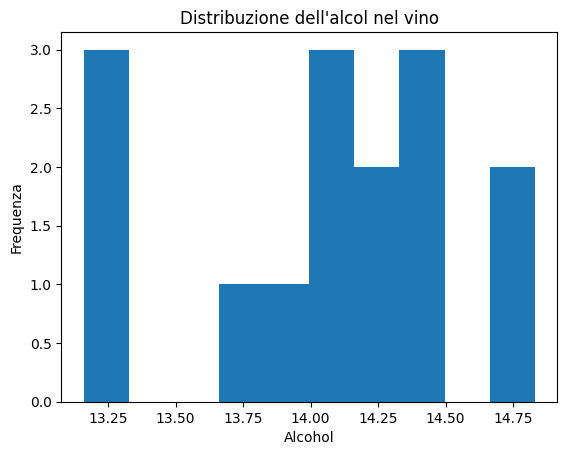

In [11]:
# Visualizzazione delle prime righe del dataset
print(wine_data.head())

# Statistiche descrittive
print(wine_data.describe())

# Grafici significativi (quindi carico la libreria adatta)
import matplotlib.pyplot as plt
import seaborn as sns

# Esempio di istogramma per una variabile
plt.hist(wine_data['alcohol'])
plt.xlabel('Alcohol')
plt.ylabel('Frequenza')
plt.title('Distribuzione dell\'alcol nel vino')
plt.show()


In [12]:
# Controlla se ci sono missing values
print(wine_data.isnull().sum())

# Gestione dei missing values (rimozione o imputazione)
# Ad esempio, per rimuovere le righe con missing values:
wine_data.dropna(inplace=True)


alcohol    0
sugar      0
ph         0
density    0
quality    0
dtype: int64


In [13]:
# Identificazione degli outliers (ad esempio, tramite z-score o IQR, servono per identificare anomalie negli autliers)
from scipy import stats

# metodo z-score
numeric_columns = wine_data.select_dtypes(include=['float64', 'int64']).columns
z_scores = stats.zscore(wine_data[numeric_columns])
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
wine_data = wine_data[filtered_entries]

# metodo IQR
numeric_columns = wine_data.select_dtypes(include=['float64', 'int64']).columns
Q1 = wine_data[numeric_columns].quantile(0.25)
Q3 = wine_data[numeric_columns].quantile(0.75)
wine_data, _ = wine_data[numeric_columns].align(Q1, axis=1)
IQR = Q3 - Q1
wine_data = wine_data[~((wine_data < (Q1 - 1.5 * IQR)) | (wine_data > (Q3 + 1.5 * IQR))).any(axis=1)]


          alcohol     sugar        ph   density
alcohol  1.000000 -0.113006  0.131252  0.371540
sugar   -0.113006  1.000000  0.675245  0.120544
ph       0.131252  0.675245  1.000000  0.414536
density  0.371540  0.120544  0.414536  1.000000


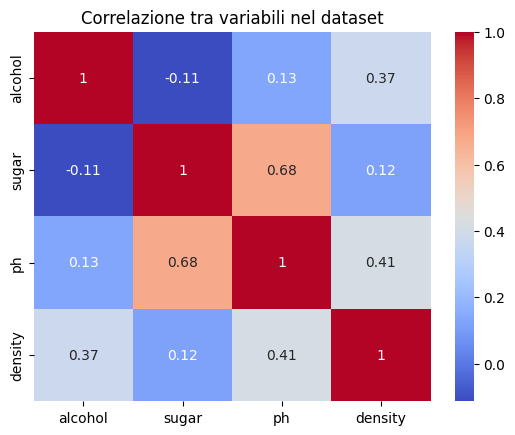

In [14]:
# Correlazioni (o statistica) tra le variabili
correlation_matrix = wine_data.corr()
print(correlation_matrix)

# Grafico di correlazione (ad esempio, una heatmap)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlazione tra variabili nel dataset')
plt.show()


In [15]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Scaling (ridimensiona i valori di un dataset in modo che abbiano una scala comune senza alterarne la loro distribuzione relativa) delle features numeriche
scaler = StandardScaler()
numeric_features = wine_data.select_dtypes(include=['float64', 'int64'])
wine_data[numeric_features.columns] = scaler.fit_transform(numeric_features)

# Encoding (codifica le variabili categoriche in un formato numerico per l'addestramento delle machine learning) delle features categoriche (solo se ci sono)
label_encoder = LabelEncoder()
wine_data['categoria_encoded'] = label_encoder.fit_transform(wine_data['ph'])


In [16]:
from sklearn.model_selection import train_test_split

# Definizione delle features (variabili o attributi che vengono utilizzate per descrivere ciascuna osservazione o campione nel dataset) e del target (è la variabile che si cerca di predire o spiegare utilizzando le features)
X = wine_data.drop('sugar', axis=1)
y = wine_data['sugar']

# Splitting del dataset in training set (viene utilizzato per addestrare il modello di machine learning) e test set (viene utilizzato per valutare le prestazioni del modello addestrato su dati non visti durante l'addestramento)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Inizializzazione dei modelli ( fase in cui i modelli di machine learning vengono preparati per l'addestramento utilizzando un set di dati specifico)
linear_model = LinearRegression()
tree_model = DecisionTreeRegressor()
forest_model = RandomForestRegressor()

# Addestramento dei modelli (processo per insegnare a un modello di machine learning a riconoscere pattern nei dati)
linear_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)
forest_model.fit(X_train, y_train)


RandomForestRegressor()

MSE per Regressione Lineare: 0.471830433352564
MSE per Albero di Decisione: 2.3157002784166574
MSE per Random Forest: 0.7491572448856068


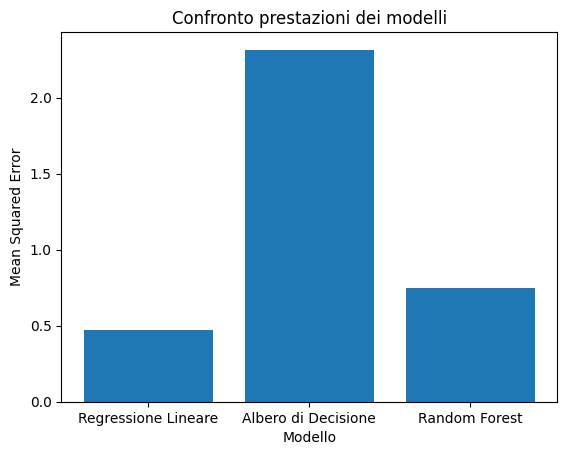

Il miglior modello è Regressione Lineare


In [18]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Valutazione dei modelli (permette di valutare l'efficacia del modello nel fare previsioni su nuovi dati e di identificare eventuali problemi come l'overfitting)
models = [linear_model, tree_model, forest_model]
model_names = ['Regressione Lineare', 'Albero di Decisione', 'Random Forest']
mse_scores = []

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    print(f"MSE per {name}: {mse}")

# Grafico dei MSE (è una metrica di errore che misura la media dei quadrati delle differenze tra i valori predetti dal modello e i valori reali nei dati di test) per confrontare le prestazioni dei modelli
plt.bar(model_names, mse_scores)
plt.xlabel('Modello')
plt.ylabel('Mean Squared Error')
plt.title('Confronto prestazioni dei modelli')
plt.show()

# Scelta definitiva del modello (quello con il MSE più basso)
best_model_index = np.argmin(mse_scores)
best_model = models[best_model_index]
best_model_name = model_names[best_model_index]
print(f"Il miglior modello è {best_model_name}")
